#Loading the Data



In [1]:
#import libraries/packages

import pandas as pd # for data manipulation
import matplotlib.pyplot as plt # for visualizations
import seaborn as sns # for visualizations

In [2]:
#loading data from GitHub
url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-08-06/olympics.csv'
olympics = pd.read_csv(url)

#dislay the first rows of dataset
print(olympics.head())

   id                      name sex   age  height  weight            team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   noc        games  year  season       city          sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              event medal  
0       Basketball Men's Basketball   NaN  
1      Judo Men's Extra-Lightweight   NaN  
2           Football Men's

#Exploring the Data

In [3]:
#checking shape of dataset
print(f"shape of dataset: {olympics.shape}")

shape of dataset: (271116, 15)


In [4]:
#display summary statistics
print("-------------------")
print("Summary Statistics:")
print("-------------------")
print()
print(olympics.describe())

-------------------
Summary Statistics:
-------------------

                  id            age         height         weight  \
count  271116.000000  261642.000000  210945.000000  208241.000000   
mean    68248.954396      25.556898     175.338970      70.702393   
std     39022.286345       6.393561      10.518462      14.348020   
min         1.000000      10.000000     127.000000      25.000000   
25%     34643.000000      21.000000     168.000000      60.000000   
50%     68205.000000      24.000000     175.000000      70.000000   
75%    102097.250000      28.000000     183.000000      79.000000   
max    135571.000000      97.000000     226.000000     214.000000   

                year  
count  271116.000000  
mean     1978.378480  
std        29.877632  
min      1896.000000  
25%      1960.000000  
50%      1988.000000  
75%      2002.000000  
max      2016.000000  


In [5]:
#checking for missing values
print("---------------")
print("Missing Values:")
print("---------------")
print(olympics.isnull().sum())

---------------
Missing Values:
---------------
id             0
name           0
sex            0
age         9474
height     60171
weight     62875
team           0
noc            0
games          0
year           0
season         0
city           0
sport          0
event          0
medal     231333
dtype: int64


#Analyzing and Visualizing the Data

###Visual 1: Medals Over Time
How have the number of medals awarded has changed over time?

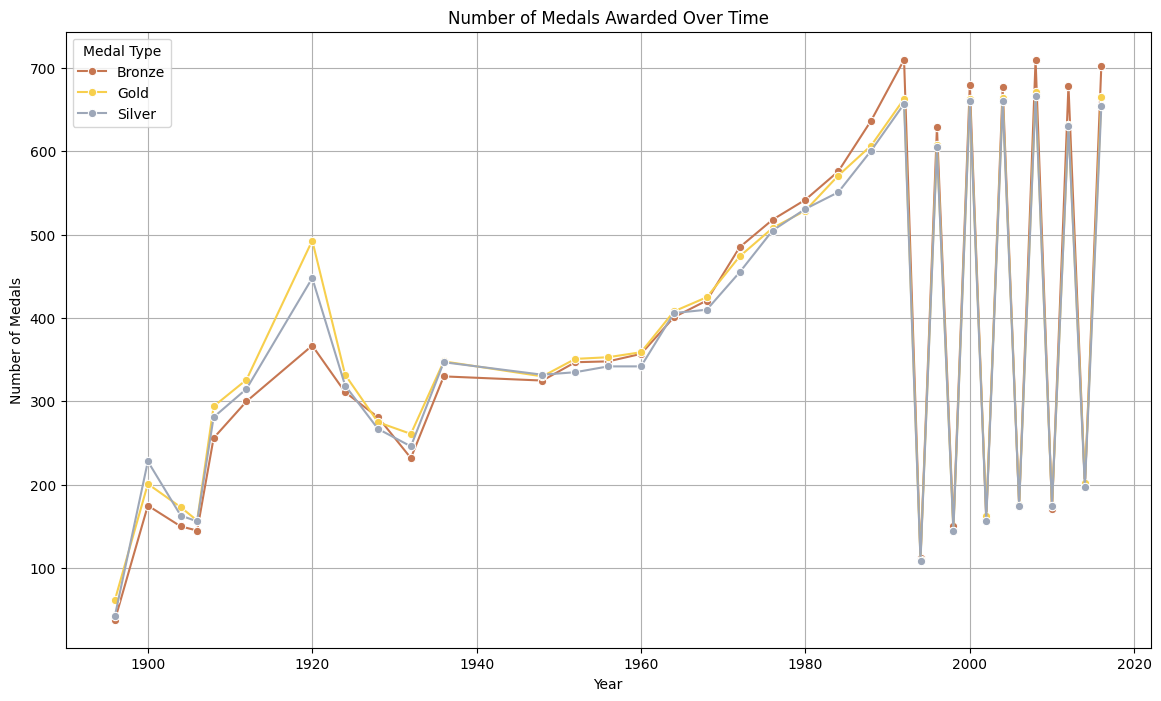

In [6]:
# Filter out rows without medals
medals = olympics.dropna(subset=['medal'])

# Counting medals by year and type
medals_over_time = medals.groupby(['year', 'medal']).size().reset_index(name='count')

medal_colors = {
    'Gold': '#F7CF4D',
    'Silver': '#9DA7B8',
    'Bronze': '#C67651'
}

# Plot medals over time
plt.figure(figsize=(14, 8))
sns.lineplot(data=medals_over_time, x='year', y='count', hue='medal', marker='o', palette=medal_colors)
plt.title('Number of Medals Awarded Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.legend(title='Medal Type')
plt.grid(True)
plt.show()

###Visual 2: Top Medal-Winning Countries
Identifying the countries that have won the most medals.

<ipython-input-7-cc8a7fa49736>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_countries, y='team', x='total_medals', palette='viridis')


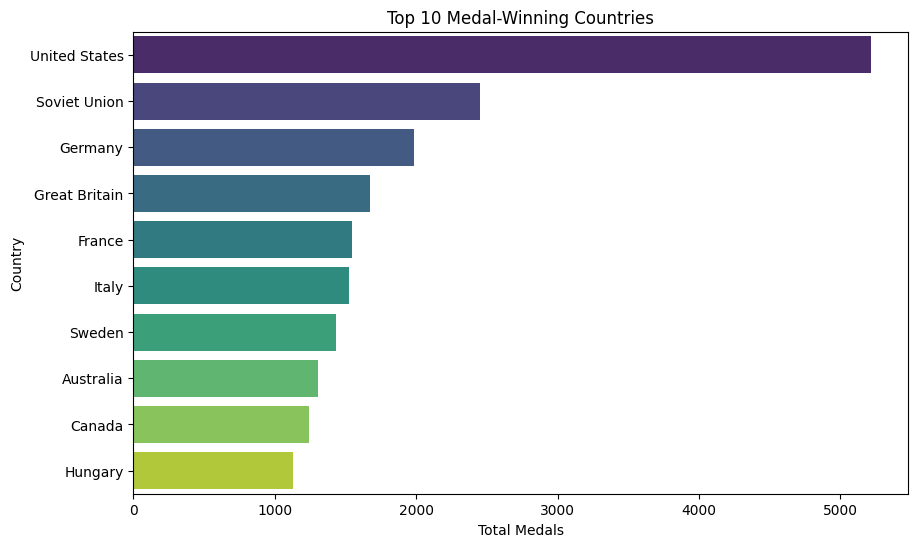

In [7]:
# Count medals by country
medals_by_country = medals.groupby('team').size().reset_index(name='total_medals')

# Top 10 Countries
top_countries = medals_by_country.sort_values(by='total_medals', ascending=False).head(10)

# Plot top medal-winning countries
plt.figure(figsize=(10,6))
sns.barplot(data=top_countries, y='team', x='total_medals', palette='viridis')
plt.title('Top 10 Medal-Winning Countries')
plt.xlabel('Total Medals')
plt.ylabel('Country')
plt.show()

### Visual 3: Athlete Characteristics
What is the distribution of athete ages?

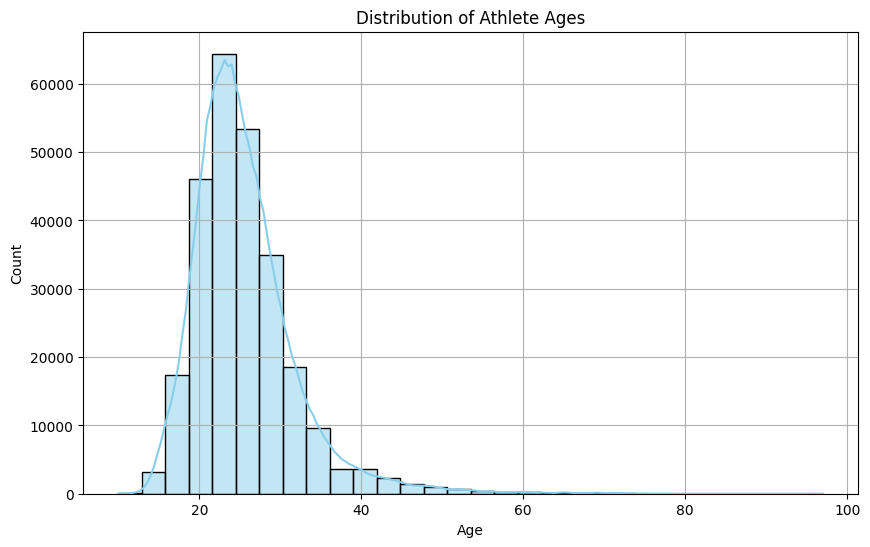

In [8]:
# Plot distribution of ages
plt.figure(figsize=(10, 6))
sns.histplot(olympics['age'].dropna(), bins=30, color='skyblue', kde=True)
plt.title('Distribution of Athlete Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(True)
plt.show()